### **Clase 8 - Dimensionalidad**

### **`Introducci√≥n`**

A lo largo de esta unidad conoceremos y emplearemos algunas t√©cnicas de aprendizaje no-supervisado. Por esto hacemos referencia a la ausencia de informaci√≥n previa sobre los atributos y/o del vector objetivo. Cuando trabajamos desde esta perspectiva, hablamos de "dimensiones latentes" como atributos existentes pero no medibles.

Dos ejemplos de aprendizaje no-supervisado pueden ser las disciplinas de reducci√≥n de
dimensionalidad y clustering.

Hablamos de t√©cnicas de reducci√≥n de dimensionalidad cuando el objetivo es minimizar una gran cantidad de atributos en una serie de dimensiones sustancialmente menores.

Las t√©cnicas de clustering buscan agrupar los puntos en distintos conjuntos de datos dado reglas de similitud o diferencias.

### **`Importar librerias y carga de archivo`**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats 
import seaborn as sns
import lec7_graphs as gfx 
import warnings

warnings.filterwarnings(action="ignore") 
plt.style.use('seaborn')

In [3]:
df = pd.read_csv('cep45.csv')

### **`Maldici√≥n de la dimensionalidad`**

#### **1 - Introducci√≥n**

Los algoritmos que implementamos operan en un n√∫mero Ô¨Ånito de dimensiones que se establecen en una serie de espacios d-dimensionales, un problema en varias √°reas relacionadas a las que estamos estudiando surge cuando este n√∫mero de dimensiones aumenta mucho en comparaci√≥n con la cantidad de ejemplos, al aumentar la dimensionalidad en la que se representan los datos el ‚Äúvolumen‚Äù del espacio aumenta de forma exponencial ya que la cantidad de combinaciones posibles entre los valores que pueden tomar las dimensiones (columnas) de los ejemplos de la muestra es mucho mayor a la cantidad de ejemplos en la misma, por lo tanto, puntos en este espacio hiperdimensional estar√°n dispersos (manteniendo en nuestro ejemplo siempre una cantidad constante de ejemplos en la muestra). Este fen√≥meno se conoce como la maldici√≥n de la dimensionalidad.

El problema es que la convergencia de cualquier estimador al par√°metro verdadero de una funci√≥n deÔ¨Ånida en un espacio d-dimensional es muy lento dado al exceso de atributos y falta de observaciones. EjempliÔ¨Åquemos la distancia entre puntos cuando aumentamos la cantidad de dimensiones. Para ello implementamos la funci√≥n sim_distance.

La funci√≥n simula una serie Ô¨Ånita de 1000 puntos aleatorios en un cubo y estima sus distancias. Evaluaremos la funci√≥n cuando tenemos 2, 10, 100 y 1000 atributos. La funci√≥n retorna un histograma de la distancia y la recta roja se√±ala la media de la distancia. En la medida que aumentamos artiÔ¨Åcialmente la cantidad de dimensiones, la distancia promedio entre dos puntos aumenta substancialmente.

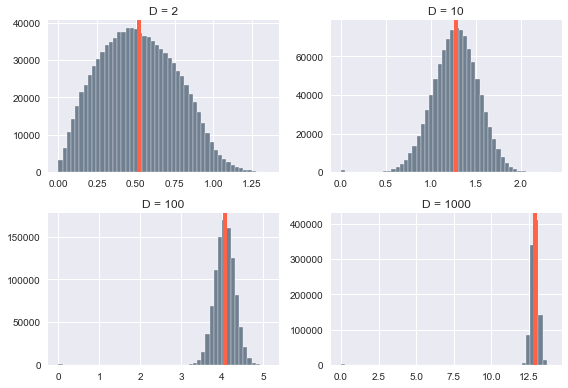

In [2]:
for i, e in enumerate([2, 10, 100, 1000]): 
    plt.subplot(2,2, i+1) 
    gfx.sim_distance(e)
    plt.tight_layout()


##### **`Digresi√≥n: Bendiciones de la dimensionalidad`**

No todo lo asociado con la dimensionalidad es negativo. Donoho (2000) sugiere que un problema a investigar con m√°s dimensiones que observaciones permite concentrar las mediciones en dimensiones que capturen distintos aspectos de los atributos.

##### **`Trabajando con la dimensionalidad`**

Existen dos escuelas de an√°lisis frente a la dimensionalidad. Una escuela psicom√©trica, enfocada en la identiÔ¨Åcaci√≥n de "factores causales" condicionales a un conjunto d >> n de datos. La otra escuela, m√°s cercana a las ciencias de la computaci√≥n busca redimensionar los factores latentes mediante la maximizaci√≥n de la varianza.

### **`An√°lisis Factorial: La visi√≥n psicom√©trica`**

#### **1 - Introducci√≥n**

El an√°lisis factorial busca extraer informaci√≥n sobre la variabilidad del conjunto Ô¨Ånito de variables, y transformarla en una serie de factores latentes (o no-observables emp√≠ricamente). Para ello, el an√°lisis busca la variaci√≥n conjunta de dos variables en respuesta a un factor espec√≠Ô¨Åco. Las variables observadas se modelan como una combinaci√≥n lineal de los factores y errores.

Si deseamos analizar c√≥mo una serie de variables observadas **X** est√°n asociadas de forma lineal a una cantidad Ô¨Ånita de factores **f**, empleamos el siguiente sistema de ecuaciones.

$$ X_1 = Œª_{10} + Œª_{11}f_{1} + ... + Œª_{1k}f_{k} + \varepsilon_1  $$
$$ X_2 = Œª_{20} + Œª_{21}f_{1} + ... + Œª_{2k}f_{k} + \varepsilon_2  $$
$$ ... $$
$$ X_N = Œª_{n0} + Œª_{n1}f_{1} + ... + Œª_{nk}f_{k} + \varepsilon_n  $$

Donde $Œª$ representa la carga asociada a la combinaci√≥n lineal y Œµ representa el error en la medici√≥n del constructo.

#### **2 - Implementando un an√°lisis de factores con factor_analyzer**

A lo largo de esta secci√≥n, trabajaremos con una encuesta del Centro de Estudios P√∫blicos realizada en Junio del 2003. Parte de la bater√≠a de preguntas est√° asociada a preguntas sobre el nivel de conÔ¨Åanza institucional.

Las preguntas se reÔ¨Åeren la evaluaci√≥n en una serie de instituciones de la sociedad civil, tales como:

-	`p17_a`: La Iglesia Cat√≥lica.
-	`p17_b`: La Iglesia Evang√©lica.
-	`p17_c`: Las Fuerzas Armadas.
-	`p17_d`: Los Tribunales de Justicia.
-	`p17_e`: La Prensa Escrita.
-	`p17_f`: La Televisi√≥n.
-	`p17_g`: Los Sindicatos.
-	`p17_h`: Los Carabineros.
-	`p17_i`: El Gobierno.
-	`p17_j`: Los Partidos Pol√≠ticos.
-	`p17_k`: El Congreso.
-	`p17_l`: Las Empresas.
-	`p17_m`: Las Universidades.
-	`p17_n`: La Radio.


Cada una de estas preguntas se evalu√≥ en una escala entre 1 (Mucha ConÔ¨Åanza), 2 (Bastante ConÔ¨Åanza), 3 (No Mucha ConÔ¨Åanza), 4 (Ninguna ConÔ¨Åanza). Las categor√≠as 8 (No sabe), 9 (No contesta) representan valores perdidos.

Para implementar un an√°lisis factorial en Python, utilizaremos la librer√≠a factor_analyzer.


##### **`Digresi√≥n: Instalando librer√≠as con conda-forge`**

Dado que la cantidad de librer√≠as que se generan en Python, el administrador conda por defecto no logra incluir todas las librer√≠as. En el caso que queramos instalar nuevas librer√≠as, podemos utilizar el terminal.
```
conda install -c conda-forge <nombrelibreria>
```

Para este caso, importamos las librer√≠as factor_analyzer y missingno, para realizar an√°lisis factorial y visualizar patrones de datos perdidos, respectivamente.
```
conda install -c desilinguist factor_analyzer

conda install -c conda-forge missingno
```

Hay una caracter√≠stica no menor del an√°lisis factorial: `las variables deben compartir la misma escala`. Para este ejemplo no es un problema mayor, dado que emergen de un dise√±o estad√≠stico deliberado y las variables contienen una estructura coherente. A√∫n as√≠, podr√≠amos estar ante la eventualidad de variables en distintas escalas. Una alternativa viable es estandarizar todas las variables a incorporar en el an√°lisis factorial.

##### **`Digresi√≥n: Estandarizando un conjunto de variables`**

Ante la eventualidad de estandarizar, la opci√≥n m√°s viable es mapear una funci√≥n a lo largo del conjunto de variables. Esto se puede lograr con:

In [ ]:
df.loc[:, 'conjunto':'variables'].applymap(lambda x: stats.zscore(x))

Importemos la base de datos:

In [5]:
import factor_analyzer as factor
import missingno as msngo

Nuestro objetivo es pre procesar y analizar la bater√≠a de preguntas asociadas a la conÔ¨Åanza institucional. Para ello nos enfocaremos en el comportamiento emp√≠rico de las variables y en las tasas de valores perdidos.

Dado que trabajaremos de manera reiterada con este conjunto, una buena pr√°ctica es separarlo en un nuevo objeto. Ya sabemos c√≥mo segmentar columnas con `loc`, ahora lo haremos con `filter`. Dentro de los argumentos de `filter` implementaremos la opci√≥n regex, que emplea expresiones regulares para encontrar patrones comunes entre strings. Para este caso emplearemos un asterisco como comod√≠n.
Con nuestra bater√≠a seleccionada, graÔ¨Åquemos el comportamiento de las respuestas utilizando `iteritems()` como un orientador del loop. Se observa que a lo largo de todas las preguntas las tasas de no respuesta son bajas, no superando el 1% del total de las observaciones.

In [6]:
# filtramos las columnas
trust_df = df.filter(regex="p17_*")

trust_df = trust_df.rename(columns={'p17_a': 'I.Catolica', 'p17_b': 'I.Evangelica', 'p17_c': 'FFAA', 'p17_d': 'Justicia',
'p17_e': 'Prensa', 'p17_f': 'Television', 'p17_g':'Sindicatos', 'p17_h':'Carabineros',
'p17_i': 'Gobierno', 'p17_j': 'PartidosPol', 'p17_k': 'Congreso', 'p17_l':'Empresas',
'p17_m':'Universidades', 'p17_n':'Radio'})

In [25]:
trust_df.head()

I.Catolica  I.Evangelica  FFAA  Justicia  Prensa  Television  Sindicatos  \
0           2             4     3         2       3           3           3   
1           2             3     3         3       3           3           2   
2           4             4     4         4       3           3           4   
3           1             3     2         2       3           2           3   
4           3             3     2         1       2           2           1   

   Carabineros  Gobierno  PartidosPol  Congreso  Empresas  Universidades  \
0            4         3            3         2         3              2   
1            2         3            4         3         3              3   
2            4         4            4         4         3              4   
3            3         3            4         3         3              3   
4            1         2            3         2         2              2   

   Radio  
0      2  
1      3  
2      2  
3      3  
4      2

In [7]:
def fetch_missing(df, missing_vals):
    for colname, serie in df.iteritems(): 
        print(colname, serie.isin(missing_vals).value_counts('%')[1].round(2))

fetch_missing(trust_df, missing_vals=[8, 9])

I.Catolica 0.03
I.Evangelica 0.07
FFAA 0.04
Justicia 0.04
Prensa 0.03
Television 0.02
Sindicatos 0.09
Carabineros 0.02
Gobierno 0.03
PartidosPol 0.03
Congreso 0.05
Empresas 0.04
Universidades 0.07
Radio 0.03


La funci√≥n matrix dentro de la librer√≠a `missingno` permite visualizar la matriz de datos, las l√≠neas en blanco representan respuestas perdidas (o negadas) por el encuestado. De manera similar a lo entregado por nuestra funci√≥n `fetch_missing`, las preguntas con mayores niveles de perdidos son `p17_b` (La Iglesia Evang√©lica), `p17_g` (Los Sindicatos), `p17_m` (Las Universidades).

Esperamos que estas variables presenten cargas bajas en los factores. Este punto ser√° retomado posteriormente.

<AxesSubplot:>

<Figure size 288x288 with 0 Axes>

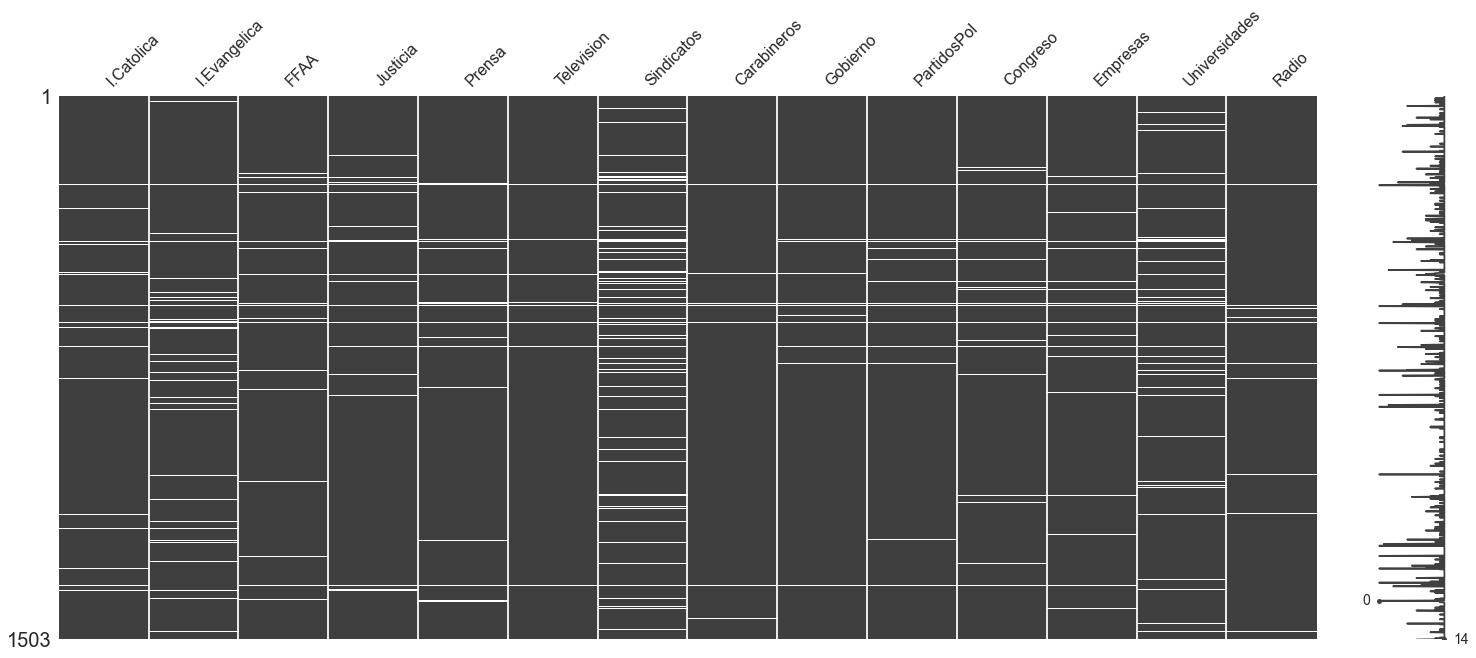

In [8]:
plt.figure(figsize=(4,4)) 
msngo.matrix(trust_df.replace([8, 9], [np.nan, np.nan]))

Una vez analizado el patr√≥n de datos perdidos, optamos por eliminarlos y procedemos con inspeccionar las medias de cada variable en la bater√≠a de preguntas mediante un dotplot.

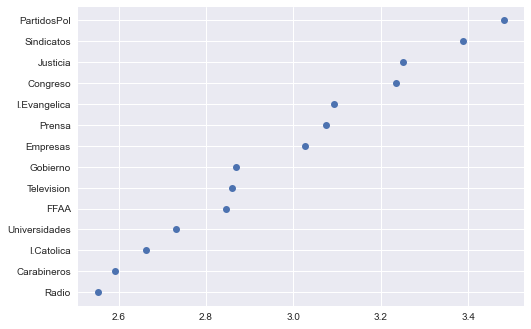

In [9]:
# Generamos dos arrays vac√≠os para guardar el nombre de la variable y la media
variable = [] 
mean = []

# para cada columna de la base, extraemos su nombre y sus valores
for colname, serie in trust_df.iteritems(): 
    # guardamos el nombre en variable 
    variable.append(colname)
    # calculamos y procesamos la media 
    mean.append(serie.mean())

df = pd.DataFrame({'var':variable, 'mean': mean}).sort_values(by=['mean']) 
plt.plot(df['mean'], df['var'],'o')

Este lo hicieron en clase:

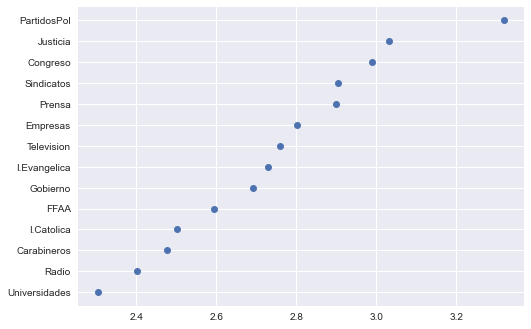

In [33]:
df_mean = trust_df.replace([8, 9], [np.nan, np.nan]).mean().reset_index().rename(columns={'index':'var', 0:'mean'}).sort_values('mean')
plt.plot(df_mean['mean'], df_mean['var'],'o')

Recordemos que valores m√°s altos en la escala de conÔ¨Åanza signiÔ¨Åca que la sociedad conf√≠a menos en las instituciones. En un extremo observamos a instituciones de car√°cter pol√≠tico como los Partidos Pol√≠ticos, los Tribunales de Justicia, el Congreso y los Sindicatos.

En el otro extremo encontramos a instituciones "cotidianas", aquellas que presentan un mayor grado de interacci√≥n con las personas como los Carabineros, la Iglesia Cat√≥lica y la Radio. Esto entrega indicios sobre dos grupos de instituciones.

Antes de modelar los factores latentes de nuestro modelo, es necesario realizar un par de pruebas sobre la idoneidad de nuestra matriz de datos para extraer factores. Las pruebas de esfericidad de Barlett y de muestreo de Kaiser-Meyer-Olkin entregan informaci√≥n sobre el grado de covarianza entre variables en la bater√≠a de preguntas. Si nos encontramos ante casos donde las cargas en la matriz de covarianza son bajas y/o responden a otras estructuras de datos, es preferible implementar otros enfoques que escapan a los objetivos del curso.

#### **3 - Prueba de esfericidad de errores de Bartlett**

Debemos preguntarnos si nuestra matriz de correlaciones entre los atributos es o no una matriz de identidad (matriz donde la diagonal principal es de 1 y los tri√°ngulos superiores e inferiores son 0), de ocurrir eso estar√≠amos viendo columnas completamente perpendiculares entre s√≠, por lo tanto, no comparten informaci√≥n en com√∫n *1. Un supuesto clave sobre la estructura de nuestra matriz de datos y que requerimos para justiÔ¨Åcar el proceso de extracci√≥n de factores latentes es que parte de la varianza de nuestras variables sea com√∫n entre ellas (o al menos entre algunas de ellas).

En esta prueba, la hip√≥tesis nula es que la matriz de correlaciones entre las variables de nuestra matriz es una matriz identidad, mientras que la hip√≥tesis alternativa es que esta es distinta a una identidad. De manera similar a las otras pruebas de estad√≠sticos de ajuste, si encontramos evidencia para fallar en rechazar la hip√≥tesis nula con un cierto grado de conÔ¨Åanza (90%, 95% o 99%, por ejemplo), la prueba concluye que la matriz sigue una distribuci√≥n multivariada normal, no una matriz de identidad, por lo que se puede proceder con el an√°lisis de factores.

Para implementar la prueba dentro de Python, utilizamos el m√©todo `calculate_bartlett_sphericity` de la librer√≠a `factor_analyzer` en nuestra bater√≠a de preguntas. La prueba retorna el valor del estad√≠stico de contraste `chi-square` y un `p-value` asociado a ese estad√≠stico. En este caso, la prueba de esfericidad sugiere que la matriz de correlaciones no es igual a la matriz de identidad con un grado suÔ¨Åcientemente alto de conÔ¨Åanza (de hecho tan peque√±o fue el pvalor que se nos entreg√≥ aproximado simplemente a 0.0), por lo que se puede seguir con el an√°lisis.

- $H_0$ = La matriz de correlaciones es una matriz de identidad (Hip√≥tesis nula)
- $H_1$ = La matriz de correlaciones no es una matriz de identidad (Hip√≥tesis alternativa)

In [34]:
import factor_analyzer as fact

statistic, p_valor = fact.calculate_bartlett_sphericity(trust_df)

statistic, p_valor

(6644.835705911964, 0.0)

*1 La raz√≥n por la que la diagonal principal de esa matrix estar√≠a compuesta por unos mientras que las matrices triangulares superior e inferior son nulas, es porque esto signiÔ¨Åca que cada par de variables tienen correlaci√≥n de 0 entre s√≠, sin embargo, una variable tiene correlaci√≥n de 1 consigo misma.

Claramente no es una matriz de identidad:

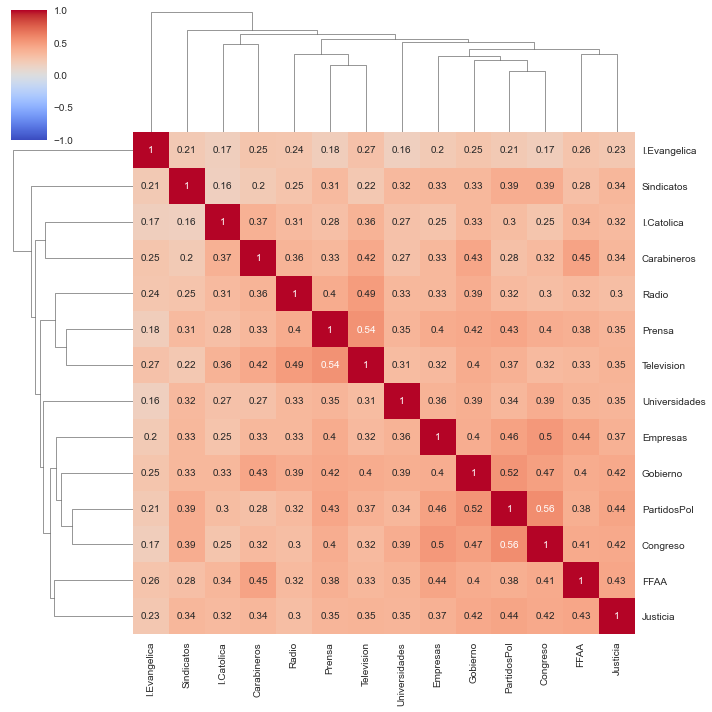

In [36]:
sns.clustermap(trust_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

#### **4 - Prueba de muestreo Kaiser-Meyer-Olkin (KMO)**

De manera adicional a la prueba de Bartlett, podemos medir si las correlaciones parciales dentro de la matriz son cercanas a 0. De ser este el caso, la prueba sugiere la existencia de por lo menos un factor latente dentro de la bater√≠a de preguntas.

Se puede implementar mediante el m√©todo `calculate_kmo` de la librer√≠a `factor_analyzer`. El m√©todo devuelve el puntaje KMO para cada √≠tem dentro de la bater√≠a, as√≠ como un puntaje global para todos los items.

Se sugiere que para seguir con el an√°lisis factorial, el KMO debe presentar valores superiores a 0.7. En este caso se satisface el punto y podemos proseguir.

Ante el caso en que encontremos puntajes bajos, la estructura a estimar se puede mejorar al eliminar los √≠tems con cargas KMO inferiores al puntaje de corte.

La eliminaci√≥n de estos √≠tems permite liberar la matriz de elementos inestables que diÔ¨Åculten la identiÔ¨Åcaci√≥n de los factores a extraer.

- Hay correlaciones mayores a 0 entre las diferentes variables
- Tenemos 14 variables, por tanto me entrega 14 valores de KMO
- 0.927465719411127 corresponde al valor global. Como este valor es > a 0.7 nosotros podemos decir que claramente existen factores latentes

In [11]:
fact.calculate_kmo(trust_df)

(array([0.93853431, 0.92717654, 0.93176781, 0.95285454, 0.91971575,
        0.88552639, 0.93671982, 0.91120486, 0.93981619, 0.91291311,
        0.91928052, 0.94234885, 0.95178434, 0.93221226]),
 0.927465719411127)

Ejemplo:

In [37]:
random_dataset = pd.DataFrame(np.random.rand(1000, 3))
print(pd.DataFrame(random_dataset.corr()))
fact.calculate_kmo(random_dataset)

          0         1         2
0  1.000000  0.048303 -0.073699
1  0.048303  1.000000  0.042184
2 -0.073699  0.042184  1.000000


(array([0.47919584, 0.46243895, 0.47769907]), 0.4749258442633766)

In [39]:
random_dataset.tail()

0         1         2
995  0.399214  0.254476  0.694907
996  0.827567  0.395285  0.297964
997  0.230070  0.491768  0.464476
998  0.409224  0.568998  0.880104
999  0.714462  0.632606  0.045589

Podemos decir seg√∫n el valor global que no existen factores latentes entre las 3 variables

#### **5 - Estimando la cantidad de factores a extraer**

Posterior al an√°lisis de la idoneidad de nuestra matriz de datos para el an√°lisis factorial, la siguiente pregunta a responder es ¬øqu√© tantos factores necesitamos?

Para ello podemos analizar los valores propios (eigenvalues) de la descomposici√≥n de la matriz. Estos informan qu√© tanta varianza se puede atribuir un factor en espec√≠Ô¨Åco. Mediante la deÔ¨Ånici√≥n de qu√© tantos factores necesitamos para caracterizar una matriz podemos obtener una estructura parsimoniosa e interpretable.

La manera m√°s simple de analizar esto es mediante un scree plot, que visualiza los eigenvalues en la medida que se aumenta la cantidad de factores. Por convenci√≥n no pueden existir m√°s factores que variables dentro de la matriz.

Comencemos por implementar un modelo con `factor_analyzer`.

-	Nuestro objeto instanciado, podemos implementar el an√°lisis con `factorize.analyze`. El primer par√°metro (`data`) que debe ser ingresado es la matriz a descomponer. El segundo par√°metro (`n_factors`) es la cantidad de factores a extraer. Por √∫ltimo, `method` hace referencia a la rotaci√≥n aplicada en la matriz de cargas. Implementaremos la estrategia m√°s simple conocida como `varimax`.

-	Con las cargas Œª podemos estimar una matriz de covarianza Œõ para calcular la matriz de covarianza observable. Asumiendo el cumplimiento de los supuestos, se asume que Œõ es un buen aproximado de la covarianza observable.

-	Por lo general empleamos An√°lisis de Componentes Principales para estimar la comunalidad total de la matriz.

-	Las cargas Œª no tienen una identiÔ¨Åcaci√≥n √∫nica, por lo que se puede emplear una "rotaci√≥n" de la matriz para encontrar una mejor estructura latente. Est√°n los m√©todos ortogonales (que no permiten correlaci√≥n entre factores) y oblicuos (que s√≠ permiten correlaci√≥n entre factores). Algunas de las m√°s utilizadas son:

    -	`Varimax`: Rotaci√≥n que busca maximizar la varianza de las cargas para cada factor.

    -	`Quartimax`: Rotaci√≥n que busca maximizar la varianza de las cargas y tiende a producir cargas m√°s altas para cada variable.
 
-	Para generar el scree plot, extraemos los eigenvalues reportados en `factorize.get_eigenvalues()[0]` y los graÔ¨Åcamos contra la cantidad de factores estimables.

¬øComo obtener los factores latentes?

In [52]:
# Generamos una nueva instancia en el objeto factorize 
factorize = fact.FactorAnalyzer(n_factors=2) 
# Implementamos el an√°lisis
factorize.fit(trust_df) 
# extraemos los eigenvalues
factor_screeplot = factorize.get_eigenvalues()[0]

In [55]:
factor_screeplot

array([5.49842419, 1.14587292, 0.89926341, 0.85550809, 0.72165128,
       0.69572011, 0.63389523, 0.62396403, 0.60609083, 0.57058745,
       0.49919319, 0.46208615, 0.40448333, 0.38325979])

- El valor `5.49842419` lo que me dice es que este factor latente me captura la varianza de 5 variables y asi con las otras

In [49]:
# Si sumo todos esos valores es igual a 14, el numero de variables
sum(factor_screeplot)

13.999999999999995

In [50]:
# graficamos los eigenvalues contra la cantidad de dimensiones estimables
plt.plot(range(1, factor_screeplot.shape[0] + 1), factor_screeplot, 'o-', color='tomato')
plt.xlabel('N√∫mero de Factor') 
plt.ylabel('Valores Propios')
# visualizamos el criterio de corte 
plt.axhline(1)
plt.title("Scree plot")

Text(0.5, 1.0, 'Scree plot')

`A modo de gu√≠a`: Un factor con valor propio de exactamente 1 signiÔ¨Åca que ese factor explica una parte de la varianza igual a la de una variable, de forma an√°loga, un factor con valor propio mayor/menor a 1 explica una varianza total mayor/menor a la de una sola variable.

La convenci√≥n indica que se deben preservar todos los factores con `eigenvalues` mayores a 1. De esta forma maximizamos la cantidad de varianza explicada por la matriz. Los resultados indican que hay 2 dimensiones sustanciales.

##### **`Digresi√≥n: Sobre los criterios de elecci√≥n del n√∫mero de factores`**

Si bien en esta ocasi√≥n utilizamos el valor propio de los factores como criterio de selecci√≥n, cabe destacar que no existe una regla clara a la hora de escoger la cantidad de factores a preservar y todo depende de lo que veamos en el gr√°Ô¨Åco, por ejemplo, otra regla com√∫n para esta tarea es Ô¨Åjarse en el 'codo' de la curva en el scree plot, si nos Ô¨Åjamos, la curva parece disminuir la pendiente a valores cercanos a 0 en el factor 3, por lo que podemos tomar ese punto como l√≠mite para los factores con los que nos quedaremos, en este caso, con los factores 1 y 2.

#### **6 - Extracci√≥n e interpretaci√≥n de los factores**

La evidencia apunta que nuestro modelo est√° correctamente especiÔ¨Åcado, y tenemos 2 grandes dimensiones no observables. Para extraer los resultados sobre qu√© preguntas est√°n asociadas entre s√≠, podemos solicitar las cargas Œª en cada factor con `factorize.loading`.

In [54]:
factor_loadings = factorize.loadings_
print(factor_loadings.shape)
print(factor_loadings)

(14, 2)
[[-0.00606221  0.5309732 ]
 [ 0.06578969  0.31599554]
 [ 0.34283819  0.3281199 ]
 [ 0.45383651  0.19986893]
 [ 0.22914628  0.45086225]
 [-0.14495462  0.83269491]
 [ 0.58749125 -0.06519098]
 [-0.0067893   0.62601668]
 [ 0.42493375  0.30851975]
 [ 0.74100403 -0.01945788]
 [ 0.86817912 -0.15757661]
 [ 0.58873065  0.07625493]
 [ 0.40397717  0.18097999]
 [-0.01982071  0.6363569 ]]


In [56]:
factor_loadings = pd.DataFrame(factor_loadings)
factor_loadings.columns = ['Factor1', 'Factor2']
factor_loadings.index = trust_df.columns

factor_loadings

Factor1   Factor2
I.Catolica    -0.006062  0.530973
I.Evangelica   0.065790  0.315996
FFAA           0.342838  0.328120
Justicia       0.453837  0.199869
Prensa         0.229146  0.450862
Television    -0.144955  0.832695
Sindicatos     0.587491 -0.065191
Carabineros   -0.006789  0.626017
Gobierno       0.424934  0.308520
PartidosPol    0.741004 -0.019458
Congreso       0.868179 -0.157577
Empresas       0.588731  0.076255
Universidades  0.403977  0.180980
Radio         -0.019821  0.636357

La informaci√≥n presentada en la matriz no es muy clara. Emplearemos un par de m√©todos para simpliÔ¨Åcar su interpretaci√≥n:

1.	El m√©todo `applymap` permite aplicar una funci√≥n a una serie de columnas. En este caso implementaremos una funci√≥n `lambda` en ambas columnas.

2.	El primer elemento a emplear es reemplazar los valores con un string vac√≠o cuando sus cargas sean menores a 0.4. La l√≥gica de excluir cargas menores es limpiar cargas bajas con cada factor y simpliÔ¨Åcar la estructura. Esto lo logramos con `np.where`.

3.	El segundo elemento es redondear las cargas en aquellos elementos sustanciales con `round`.

In [57]:
factor_loadings.applymap(lambda x: np.where(x < .4, ' ', round(x, 2)))

Factor1 Factor2
I.Catolica               0.53
I.Evangelica                 
FFAA                         
Justicia         0.45        
Prensa                   0.45
Television               0.83
Sindicatos       0.59        
Carabineros              0.63
Gobierno         0.42        
PartidosPol      0.74        
Congreso         0.87        
Empresas         0.59        
Universidades     0.4        
Radio                    0.64

Las cargas se√±alan que el Factor 1 se compone de instituciones expl√≠citamente pol√≠ticas, donde destacan el Poder Judicial, los Sindicatos, El Gobierno, Los Partidos Pol√≠ticos, el Congreso, las Empresas y Universidades. Este factor se puede denominar como conÔ¨Åanza en los elementos m√°s pol√≠ticos de las instituciones.

El Factor 2 presenta cargas altas asociadas a la Iglesia Cat√≥lica, Prensa, Televisi√≥n, Carabineros y Radio. A diferencia del primer factor, en este predominan los elementos m√°s cotidianos de la sociedad. Estas son las instituciones con las cuales se interact√∫a de una manera m√°s frecuente.

Ambos factores est√°n asociados y se pueden presentar en un diagrama de dispersi√≥n. Este muestra que ambos se sit√∫an en una relaci√≥n inversa. Los valores m√°s altos en el Factor 1 est√°n asociados a valores bajos en el Factor 2.

Text(0, 0.5, 'Factor 2: 0.17')

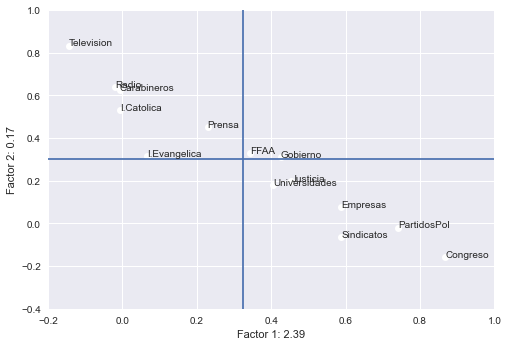

In [60]:
# guardemos la varianza explicada por cada dimensi√≥n 
factor_var = factorize.get_factor_variance()
# cruzamos ambos factores 
plt.plot(factor_loadings.Factor1, factor_loadings.Factor2,'o',color='white') 
# definimos l√≠mites
plt.xlim((-.2,1))  
plt.ylim((-.4, 1))
# Para cada elemento en los factores
for i, txt in enumerate(factor_loadings.index): 
    # anotemos el nombre de la variable
    plt.annotate(txt, (factor_loadings['Factor1'][i], factor_loadings['Factor2'][i])) 
# Grafiquemos la media de ambos factores 
plt.axvline(factor_loadings['Factor1'].mean()) 
plt.axhline(factor_loadings['Factor2'].mean())
# Reportemos la varianza de cada dimensi√≥n
plt.xlabel('Factor 1: {}'.format(round(factor_var[0][1], 2)))
plt.ylabel('Factor 2: {}'.format(round(factor_var[1][1], 2)))

##### **`¬øCu√°nto explica cada factor?`**

Resulta que cada dimensi√≥n estimada busca maximizar la varianza de la matriz. Podemos obtener la varianza explicada de cada dimensi√≥n con `get_factor_variance`. En este caso observamos que con dos dimensiones capturamos un 36% de la varianza de la matriz entre ambas dimensiones, lo cual suena bastante bajo.

De ac√° se desprende un tema no menor. De manera similar a nuestras t√©cnicas de aprendizaje automatizado donde debemos vigilar la capacidad de generalizaci√≥n del modelo mediante el trueque Sesgo-Varianza.

Mientras que un modelo con m√°s dimensiones puede aumentar la cantidad de varianza explicada, se hace a expensas de generar un modelo menos parsimonioso y dif√≠cil de interpretar.

In [61]:
factor_var = factorize.get_factor_variance() 
factor_var

(array([2.74016741, 2.38611241]),
 array([0.19572624, 0.1704366 ]),
 array([0.19572624, 0.36616284]))

In [64]:
factor_var = pd.DataFrame(factor_var)
factor_var.index = ['SS Loadings', 'Proportion Var', 'Cumulative Var']

factor_var

Factor1   Factor2
SS Loadings     2.740167  2.386112
Proportion Var  0.195726  0.170437
Cumulative Var  0.195726  0.366163

#### **7 - Extracci√≥n de puntajes**

Cada factor se presentaba como la combinaci√≥n lineal entre las cargas y las respuestas de cada √≠tem. Como tal, se pueden extraer los puntajes estimados entre ambos elementos mediante el m√©todo transform para cada factor generado.

√âstos puntajes vienen dados por la estandarizaci√≥n de los factores, por lo que tendr√°n una distribuci√≥n $\hat ùëã ‚àº ùëÅ (0, œÉ^2)$.

Los puntajes pueden ser utilizados posteriormente en modelos predictivos como variables dependientes y/o independientes, as√≠ como en la creaci√≥n y construcci√≥n de √≠ndices compuestos.

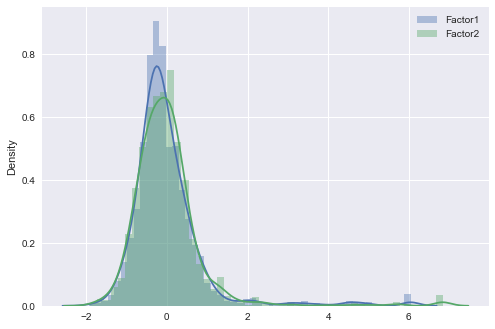

In [68]:
extract_factor_scores = factorize.transform(trust_df) 
sns.distplot(extract_factor_scores[:,0], label='Factor1') # Institucionalistas
sns.distplot(extract_factor_scores[:,1], label='Factor2') # Cotidianos
plt.legend()

In [69]:
extract_factor_scores = factorize.transform(trust_df) 
sns.distplot(extract_factor_scores[:,0], label='Institucionalistas') 
sns.distplot(extract_factor_scores[:,1], label='Cotidianos') 
plt.legend()

### **`Dimensionalidad desde Machine Learning`**

#### **1 - An√°lisis de Componentes Principales**

A diferencia del an√°lisis de factores, el An√°lisis de Componentes Principales no es un m√©todo anal√≠tico, pero un m√©todo de transformaci√≥n lineal ortogonal que mapea los datos originales en un nuevo sistema de coordenadas que busca maximizar la varianza de las extrapolaciones.

Por lo general el an√°lisis busca representar un conjunto N-dimensional de datos en un primer eje (aqu√©l que maximize m√°s la varianza), y un segundo eje (el segundo componente que maximice la varianza).

Si tenemos una matriz de datos originales X, podemos obtener la matriz transformada ùëã mediante un argumento de transformaci√≥n lineal P, que generalmente toma una forma geom√©trica (rango y rotaci√≥n).

$$ \hat X = P \times X $$

$$ \text {X = Matriz de datos redimensionada} $$
$$ \text {P = Transformaci√≥n lineal: Rango y Rotaci√≥n} $$
$$ \text {X = Matriz de datos original} $$

El An√°lisis de Componentes Principales busca reducir la redundancia de los datos entre una serie de expansiones basales candidatas. Aquella que aproxime su matriz de covarianza a una matriz diagonal (entradas diagonales cercanas a 1 y tri√°ngulos cercanos a 0), se denomina como el primer componente principal.

El proceso se itera, rankeando todas las expansiones basales en t√©rminos de maximizaci√≥n de varianza y reducci√≥n de redundancia de datos. El proceso se ilustra en la Ô¨Ågura `gfx.pca_variance()`.

In [70]:
gfx.pca_variance()

En el gr√°Ô¨Åco izquierdo se presenta un diagrama de dispersi√≥n entre dos variables $ùë•_1$ y $ùë•_2$ que presentan una relaci√≥n bivariada positiva. El objetivo del an√°lisis de componentes principales es obtener dimensiones que capturen y mapeen la varianza conjunta.

En el siguiente caso se presentan 3 rectas asociadas a los principales eigenvalues. En el lado derecho del gr√°Ô¨Åco se presenta la cantidad de varianza capturada (dado $ùëß_1$) por cada una de las dimensiones.

La recta roja se posiciona como la dimensi√≥n que captura una parte substancial de la varianza conjunta entre $ùë•_1$ y $ùë•_2$, dado que pasa de a lo largo de la tendencia. En segundo lugar, la recta amarilla captura una mayor parte de la varianza en comparaci√≥n a la tercera dimensi√≥n representada en la recta azul.

Optamos por la recta amarilla por sobre la azul dado que √©sta preserva la ortogonalidad de la matriz de datos (existe un √°ngulo de 90 grados entre ambas, lo cual implica que no hay covarianza entre √©stas dimensiones).

Supongamos que deseamos restringir nuestra reducci√≥n a las dos principales dimensiones que maximicen la varianza capturada. Nuestro criterio de selecci√≥n mantendr√≠a las rectas roja (asign√°ndole un $ùëê_1$) y amarilla (asign√°ndole un $ùëê_2$)

Existen una serie de supuestos asociados:

-	`Linealidad`: La nueva expansi√≥n basal es una expresi√≥n lineal de la base original.

-	`Media y varianza`: Media y varianza son estad√≠sticas suÔ¨Åcientes para describir la distribuci√≥n emp√≠rica de los datos. $ùëÅ(0, œÉ^2)$ es id√≥neo.

-	`SNR (Signal Noise Ratio)`: PCA asume que las din√°micas tienen un alto rango de se√±al por sobre ruido (es un m√©todo varianza-dependiente).

-	`Ortonormalidad de los componentes`: tienen norma 1 y producto de 0.

#### **2 - Digresi√≥n: Descomposici√≥n de Valores Singulares (SVD)**

Otra alternativa para encontrar los eigenvalues de una matriz de datos es mediante la descomposici√≥n de valores singulares. Esta busca separar la matriz en tres componentes, siguiendo la f√≥rmula:

Donde:

-	$ùëà$ es una matriz `n x n` que representa la matriz ortogonal de las columnas.
-	$Œ£$ es una matriz `n x m` que representa la matriz diagonal.
-	$ùëâ$ es una matriz `m x m` que representa la matriz ortogonal de las Ô¨Ålas.


El efecto de esta √∫ltima es generar una medici√≥n de la importancia relativa de cada columna y Ô¨Åla de la matriz `X`.

La principal diferencia entre PCA y SVD es que la primera obtiene las dimensiones mediante la maximizaci√≥n de la varianza en `d` dimensi√≥n, y SVD obtiene las dimensiones mediante la medici√≥n de la importancia relativa.

SVD se considera num√©ricamente m√°s estable y puede ser m√°s eÔ¨Åciente en estimar las dimensiones.


#### **3 - IdentiÔ¨Åcando n√∫meros escritos**

Una de las principales aplicaciones del PCA es la reducci√≥n de dimensionalidad cuando tenemos muchos m√°s atributos que observaciones. Un ejemplo cl√°sico de esto es el reconocimiento de im√°genes, una imagen se compone de una serie de pixeles distribuidos de forma cuadrada o rectangular.

Durante este ejemplo utilizaremos la base de datos MNSIT de n√∫meros escritos a mano disponibles en http://yann.lecun.com/exdb/mnist/. Partamos por ver la representaci√≥n nativa de un n√∫mero en la base. La base de datos se encuentra como parte de scikit-learn.

In [71]:
from sklearn.datasets import load_digits 
df = load_digits()

Solicitemos el array 8 de esta base de datos. La informaci√≥n viene en un array unidimensional como representaci√≥n nativa. Cada uno de los valores Ô¨Çuct√∫a entre 0 y 1, donde mayores valores representan saturaciones mayores en la escala de grises. Vamos a reacomodar el array a una matriz de 8 x 8 con `reshape`.

In [95]:
df.target[8]

8

In [72]:
df.data[8].reshape([8,8])

array([[ 0.,  0.,  9., 14.,  8.,  1.,  0.,  0.],
       [ 0.,  0., 12., 14., 14., 12.,  0.,  0.],
       [ 0.,  0.,  9., 10.,  0., 15.,  4.,  0.],
       [ 0.,  0.,  3., 16., 12., 14.,  2.,  0.],
       [ 0.,  0.,  4., 16., 16.,  2.,  0.,  0.],
       [ 0.,  3., 16.,  8., 10., 13.,  2.,  0.],
       [ 0.,  1., 15.,  1.,  3., 16.,  8.,  0.],
       [ 0.,  0., 11., 16., 15., 11.,  1.,  0.]])

La matriz retornada a√∫n resulta poco intuitiva, porque est√° dise√±ada para ser interpretada de forma eÔ¨Åciente por el computador y no el ojo humano. Implementaremos el m√©todo `imshow` de `matplotlib` para generar una representaci√≥n "m√°s afable" al ojo humano.

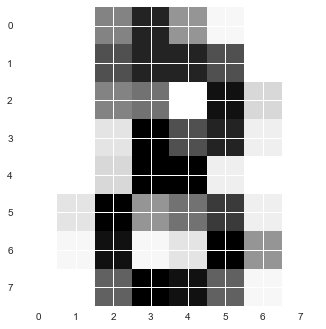

In [73]:
plt.imshow(df.data[8].reshape([8, 8]))

La matriz equivale al n√∫mero 8. Nuestro objetivo es abstraer las principales caracter√≠sticas de los trazos al momento de escribir. Para ello implementaremos un An√°lisis de Componentes Principales. Su implementaci√≥n se encuentra en la clase `PCA` del m√≥dulo `decomposition` de la librer√≠a `sklearn`.

##### **`Reduciendo dimensiones`**

Sabemos que la representaci√≥n afable para el computador es una matriz con 64 columnas, donde cada una representa un porcentaje en la escala de grises. Esta representaci√≥n es poco afable para nosotros.

In [74]:
print("Dimensi√≥n original de la base:",df.data.shape)

Dimensi√≥n original de la base: (1797, 64)


Implementemos un modelo de reducci√≥n a dos dimensiones, asumiendo que √©sta es la representaci√≥n m√°s afable para el ojo humano. Partamos por importar `PCA`.

El primer paso es instanciar un objeto con la clase PCA donde ingresamos el n√∫mero de componentes que deseamos extraer con el argumento `n_components`. En este caso lo realizaremos con 2.

Posterior a la creaci√≥n del objeto, podemos ingresar los datos mediante fit_transform. La funci√≥n ejecutar√° dos procesos:

1.	`Centra los datos`: Resta la media emp√≠rica a cada valor de la variable de forma de dejarlos centrados en la misma media.
2.	`Implementaci√≥n del modelo`: Posteriormente ingresa los datos al m√©todo que descompone la matriz a una serie de eigenvalues.

In [75]:
from sklearn.decomposition import PCA

dimred = PCA(n_components = 2)
project_x = dimred.fit_transform(df.data)

La implementaci√≥n del modelo la guardamos en el objeto `project_x`. Si solicitamos las dimensiones con `shape`, observamos que pasamos de 64 a 2 columnas.

In [76]:
print("La nueva dimensi√≥n de la base es de:",project_x.shape)

La nueva dimensi√≥n de la base es de: (1797, 2)


#### **4 - ¬øY qu√© signiÔ¨Åca todo esto?**

Hasta el momento hemos realizado una serie de transformaciones, pero no obtenemos resultados tangibles al respecto. Lo que podemos hacer es graÔ¨Åcar cada una de las dos dimensiones para intentar hacer sentido al respecto.

Implementaremos un diagrama de dispersi√≥n con el m√©todo `plt.scatter`, donde ingresamos cada una de las dimensiones y modiÔ¨Åcamos los atributos visuales de los puntos para identiÔ¨Åcar cada n√∫mero con `df.target`. Finalmente implementamos `colorbar` para a√±adir una leyenda discreta a cada valor.

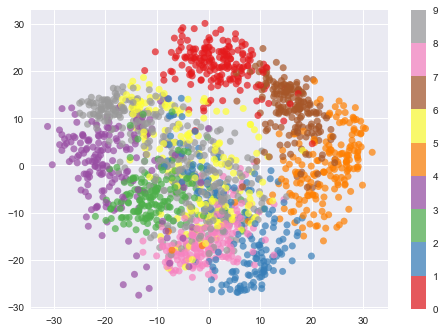

In [77]:
plt.scatter(project_x[:, 0], project_x[:, 1], c=df.target, edgecolor='none', alpha=.7, cmap='Set1') 
plt.colorbar()

Resulta que ambas dimensiones representan atributos sobre los trazos de los n√∫meros. Los trazos entre los 4 y los 9 tienden a ser similares de igual manera que 7 y 5.

#### **4 - Maximizando varianza**

Retomemos el signiÔ¨Åcado del An√°lisis de Componentes Principales: `buscar aquellas dimensiones que maximicen la varianza total de una matriz Ô¨Ånita de datos`.

As√≠, parte importante de la implementaci√≥n de PCA es el estimar cu√°ntos elementos son necesarios para obtener el m√°ximo de varianza explicada. Solicitemos la varianza explicada de cada dimensi√≥n de nuestro primer modelo.

In [78]:
print("La varianza explicada de cada dimensi√≥n es de:",dimred.explained_variance_ratio_)
print("En conjunto, ambas dimensiones explican la varianza en un: ", sum(dimred.explained_variance_ratio_))

La varianza explicada de cada dimensi√≥n es de: [0.14890594 0.13618771]
En conjunto, ambas dimensiones explican la varianza en un:  0.2850936482369777


Estos n√∫meros se pueden mejorar de forma substancial. Para obtener una evaluaci√≥n agn√≥stica de la cantidad de dimensiones, podemos instanciar un objeto `PCA` sin declarar la cantidad de dimensiones en `n_components`. Esta informaci√≥n la graÔ¨Åcaremos de la siguiente manera:

1.	Primero extraemos la cantidad de dimensiones estimadas por el modelo. Un punto a mencionar es que el l√≠mite superior de la cantidad de dimensiones es $\hat ùëã_ùëë = ùëù$.

2.	GraÔ¨Åcaremos el porcentaje de varianza explicada de cada elemento en barras verticales.

3.	Para visualizar la varianza acumulada a lo largo de las dimensiones, utilizamos `plt.step`.

In [79]:
fetch_dims = PCA().fit(df.data) 
dims_quant = len(fetch_dims.components_)

plt.bar(range(1, dims_quant + 1),fetch_dims.explained_variance_ratio_,label="Varianza de cada dimensi√≥n")
plt.step(range(1,len(fetch_dims.components_) + 1), np.cumsum(fetch_dims.explained_variance_ratio_), color='tomato', label="Varianza acumulada")
plt.xlabel('N√∫mero de dimensiones') 
plt.ylabel('Varianza') 
plt.legend()

Se observa que con alrededor de 10 dimensiones alcanzamos un 80% de varianza explicada. Despu√©s de la 10 dimensi√≥n la curva de varianza acumulada tiende a suavizarse, y cuando se alcanzan 30 dimensiones la cantidad de varianza explicada por cada dimensi√≥n es cercana a 0.

Factoricemos nuestro modelo con `d=10`. Explicamos un 74% de la varianza con 10 dimensiones.

In [80]:
pca = PCA(n_components=10)
project_x = pca.fit_transform(df.data)

print("Varianza acumulada con 10 dimensiones:", np.cumsum(pca.explained_variance_ratio_)[-1])

Varianza acumulada con 10 dimensiones: 0.7382262239711577


#### **5 - ¬øQu√© signiÔ¨Åca cada componente?**

Hasta el momento sabemos el objetivo general del PCA y c√≥mo refactorizar el modelo para aumentar su capacidad explicativa. Pero cada una de las dimensiones resume parte importante de c√≥mo se efect√∫a cada traza que permite identiÔ¨Åcar un n√∫mero.

Sabemos que cada n√∫mero en la base est√° representado por un array de 64 d√≠gitos entre 0 y 1.

In [81]:
df.data[6]

array([ 0.,  0.,  0., 12., 13.,  0.,  0.,  0.,  0.,  0.,  5., 16.,  8.,
        0.,  0.,  0.,  0.,  0., 13., 16.,  3.,  0.,  0.,  0.,  0.,  0.,
       14., 13.,  0.,  0.,  0.,  0.,  0.,  0., 15., 12.,  7.,  2.,  0.,
        0.,  0.,  0., 13., 16., 13., 16.,  3.,  0.,  0.,  0.,  7., 16.,
       11., 15.,  8.,  0.,  0.,  0.,  1.,  9., 15., 11.,  3.,  0.])

La representaci√≥n aproximada de una imagen mediante PCA se realiza en base a la `combinaci√≥n lineal de factores`. En este caso optimizamos nuestro algoritmo para extraer las primeras 10 dimensiones que representan el mapeo de un n√∫mero, por lo que la representaci√≥n de una imagen se lograr√≠a:

$$  imagen(x) = \mu + \sum_{i=1}^{10} \lambda_i \ x_i $$

As√≠, la reconstrucci√≥n de cada imagen es una conjetura de coeÔ¨Åcientes $\lambda_i$ estimados y multiplicados por la matriz entre 0 y 1 de las trazas.

Podemos visualizar el proceso de reconstrucci√≥n de im√°genes con el siguiente c√≥digo con la funci√≥n `plot_pca_components`.

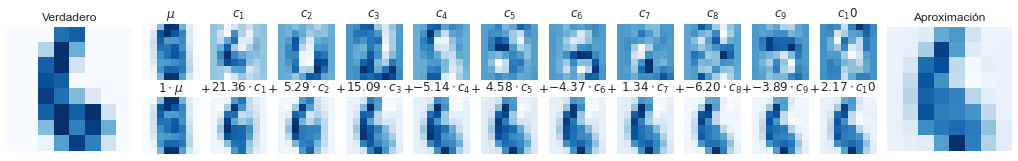

In [82]:
gfx.plot_pca_components(df.data[6], project_x[6], pca.mean_, pca.components_);

### **`Agrupaci√≥n desde Machine Learning`**

#### **1 - Algoritmos de agrupaci√≥n**

A lo largo de la lectura estudiamos la reducci√≥n de dimensionalidad como un m√©todo de aprendizaje no supervisado: tenemos una matriz de datos y nosotros tenemos poca informaci√≥n sobre c√≥mo se comportan las dimensiones latentes.

El otro m√©todo de aprendizaje es la agrupaci√≥n (o clustering en la jerga inglesa). La tarea principal de los algoritmos de agrupaci√≥n es `dividir los datos en una serie de grupos en base a alguna medida de similitud entre los puntos`. Si bien la agrupaci√≥n busca asignar etiquetas de similar manera que las estrategias de clasiÔ¨Åcaci√≥n, en los m√©todos de agrupaci√≥n `no tenemos certeza sobre la cantidad de grupos emergentes`.

Implementar algoritmos de agrupaci√≥n dentro del Ô¨Çujo de an√°lisis facilita la representaci√≥n de la estructura de los datos as√≠ como el descubrimiento de nuevos patrones.

#### **2 - KMeans**

La idea de kMeans es desarrollar una segmentaci√≥n de vectores en un espacio `d-dimensional` de manera tal de inferir grupos que no se sobrepongan. El m√©todo cl√°sico para obtener una serie de clusters se basa en:

1.	Asignar una cantidad `k` de clusters: Por lo general el investigador debe probar con distintos valores de `k`.

2.	Asignar a cada observaci√≥n en el espacio al cluster `m√°s cercano`: Los clusters se generan a partir de la media aritm√©tica de todos los puntos cercanos al cluster.

3.	Por cada cluster, actualizar su centroide como la media para todos sus puntos asignados.

4.	Iterar los puntos 2 y 3 hasta que se satisfaga alg√∫n criterio.


##### **`Implementaci√≥n`**

Para demostrar la aplicaci√≥n de kMeans generaremos un caso artiÔ¨Åcial con `make_blobs`, que permite generar "grupos de datos siguiendo una funci√≥n Gausiana Isotr√≥pica". Por Gausiana entendemos una distribuci√≥n normal, y por Isotr√≥pica entendemos una distribuci√≥n normal donde la matriz de covarianza se simpliÔ¨Åca a la matriz de identidad $Œ£ = œÉ^2 ùêº$.

La funci√≥n `make_blobs` se encuentra en el m√≥dulo `datasets` de la librer√≠a `sklearn`. La funci√≥n necesita de la cantidad de casos a simular en total deÔ¨Ånidos en `n_clusters`, as√≠ como los par√°metros media (`centers`) y varianza (`cluster_std`). En este caso generamos un array de arrays donde deÔ¨Ånimos las coordenadas de cada blob a generar, as√≠ como un array que contiene la varianza asociada a cada blob. Como con toda simulaci√≥n, es necesario deÔ¨Ånir una semilla pseudoaleatoria para asegurar replicabilidad de los resultados.

`make_blobs` retornar√° las coordenadas para cada punto en el objeto `X_mat` y la pertenencia de cada punto a alguna agrupaci√≥n.

Para este caso estamos simulando 3000 casos repartidos en 7 grupos.

In [83]:
# importamos make_blobs
from sklearn.datasets import make_blobs

# Definimos los centros	
bivariate_mu_params = list([[ 0.2, 2.3], [-1.5, 2.3], [-2.8, 1.8], [-1.8, 2.8], [-.8, 1.3], [.3, 2.1], [.4, 3]])

# Definimos las varianzas
bivariate_sigma_params = list([0.1, 0.1, 0.1, 0.1, 0.1, .1, .1])

X_mat, y_vec = make_blobs(n_samples=3000, centers=bivariate_mu_params, cluster_std=bivariate_sigma_params, random_state=11238)

plt.scatter(X_mat[:, 0], X_mat[:, 1], s=1)

Para implementar `KMeans`, lo importamos desde el m√≥dulo `cluster` de la librer√≠a `sklearn`. La forma m√°s f√°cil de instanciar una clase `KMeans`, asignamos la cantidad de grupos a identiÔ¨Åcar (que se declara en `n_clusters`) y una semilla pseudoaleatoria para replicabilidad (declarada con `random_state`).

Existen m√°s especiÔ¨Åcaciones en esta etapa como `n_init` que deÔ¨Åne la cantidad de veces que el algoritmo ser√° iniciado con distintos centroides, as√≠ como `max_iter` que deÔ¨Åne la cantidad m√°xima de iteraciones en una etapa.

In [84]:
# importamos el modulo
from sklearn.cluster import KMeans

# instanciamos KMeans en un nuevo objeto
kmeans = KMeans(n_clusters=7, random_state=11238) 

# obtenemos los resultados
fit_results = kmeans.fit_predict(X_mat)

In [85]:
kmeans.labels_

array([4, 5, 6, ..., 6, 6, 2])

In [86]:
pd.Series(kmeans.labels_).value_counts('%')

2    0.144000
1    0.143667
3    0.143000
4    0.142667
0    0.142667
5    0.142333
6    0.141667
dtype: float64

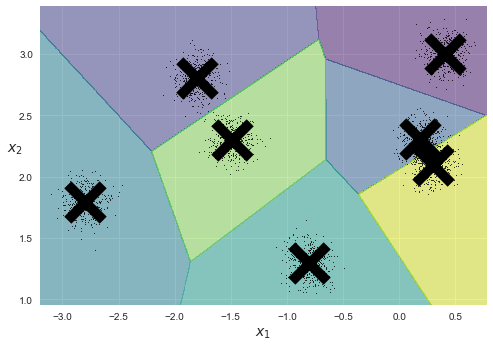

In [87]:
gfx.plot_decision_boundaries(kmeans, X_mat)

#### **3 - Inercia del modelo**

Si bien no podemos medir el desempe√±o del modelo (porque no tenemos etiquetas previas), podemos medir la distancia promedio entre cada n√∫mero y su centroide mediante la inercia, entendida como la suma de distancias cuadr√°ticas. Esto lo logramos mediante la m√©trica de inercia.

Podemos obtener la inercia de un modelo creado con `KMeans` al solicitar `.inertia_`. En este caso la inercia asociada al modelo cuando estimamos 7 clusters es de 56.

In [88]:
kmeans.inertia_

56.261155902996656

`¬øCu√°l es el resultado esperado respecto a la inercia de un modelo?` Buscamos aqu√©l que presente una reducci√≥n substancial de las distancias cuadr√°ticas entre los puntos y sus centroides. As√≠, estamos frente a una estrategia de minimizaci√≥n de p√©rdidas.

De manera similar al promedio del error cuadr√°tico en los modelos lineales, la inercia s√≥lo tiene sentido en la medida que comparamos entre m√∫ltiples candidatos. Para ello vamos a estimar la inercia cuando aumentamos la cantidad de clusters de 1 a 10 en pasos de a 1. Compararemos la inercia de cada modelo candidato mediante un gr√°Ô¨Åco.

In [89]:
# generamos un array para guardar los resultados. 
inertia = []

# Para cada n√∫mero entre 1 y 10
for i in range(1, 11):
    # Agregamos la inercia 
    inertia.append(KMeans(n_clusters=i, random_state=11238).fit(X_mat).inertia_)

# graficamos el resultado
plt.plot(range(1, 11), inertia, 'o-', color='tomato') 
plt.xlabel("Cantidad de clusters") 
plt.ylabel("Inercia")
plt.title("Elbow graph") 
plt.axvline(4)

Una estrategia ineÔ¨Åciente es escoger el modelo candidato que minimice la inercia sin tener en consideraci√≥n el resto de los modelos, dado que siempre tender√° a minimizarse en la medida que aumentamos la cantidad de grupos. Mediante el gr√°Ô¨Åco podemos encontrar un punto de inÔ¨Çexi√≥n que generalmente se encuentra antes de que la inercia se estabilice. El gr√°Ô¨Åco sugiere que un modelo que agrupe los datos entre 4 grupos minimiza la distancia entre los puntos y sus centroides.

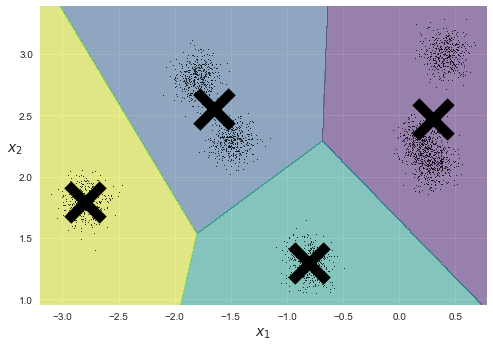

In [90]:
kmeans = KMeans(n_clusters=4, random_state=11238) 
fit_results = kmeans.fit_predict(X_mat) 
gfx.plot_decision_boundaries(kmeans, X_mat)

#### **4 - Variabilidad del algoritmo de agrupaci√≥n**

En la variante m√°s simple del algoritmo KMeans los centroides se inicializan de forma aleatoria, y √©ste busca mejorar de forma gradual la posici√≥n de los centroides.

Un problema substancial de esto es que se pueden llegar a soluciones distintas dependiendo de la semilla pseudoaleatoria.

En el siguiente ejemplo graÔ¨Åcamos dos soluciones para un modelo con 7 grupos, donde s√≥lo var√≠an `random_state`.

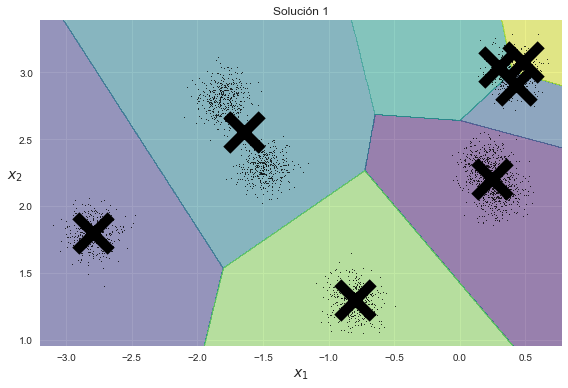

In [92]:
init_1 = KMeans(n_clusters=7, random_state=5342, init="random", n_init=1)
init_1.fit(X_mat)

init_2 = KMeans(n_clusters=7, random_state=138, init="random", n_init=1) 
init_2.fit(X_mat)

gfx.plot_decision_boundaries(init_1, X_mat) 
plt.title('Soluci√≥n 1')
plt.tight_layout()

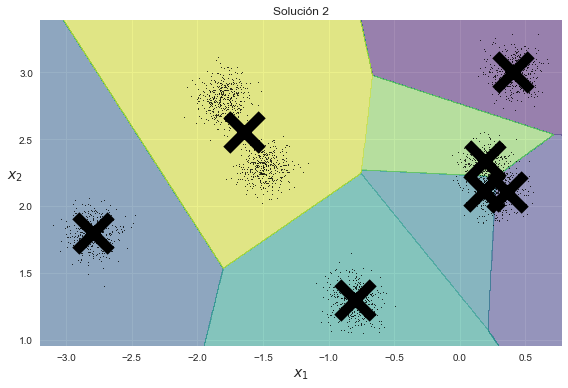

In [93]:
plt.title('Soluci√≥n 2') 
gfx.plot_decision_boundaries(init_2, X_mat) 
plt.tight_layout()